### https://github.com/krishnaik06/Handle-Imbalanced-Dataset

### https://www.analyticsvidhya.com/blog/2017/03/imbalanced-data-classification/

### Handling Imbalanced Dataset

The conventional model evaluation methods do not accurately measure model performance when faced with imbalanced datasets.

Standard classifier algorithms like Decision Tree and Logistic Regression have a bias towards classes which have number of instances. They tend to only predict the majority class data. The features of the minority class are treated as noise and are often ignored. Thus, there is a high probability of misclassification of the minority class as compared to the majority class.

In [51]:
import pandas as pd

In [52]:
df = pd.read_csv('/home/vinoth/Learning/Python/Workouts/dataset/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [53]:
df.shape

(284807, 31)

In [54]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [55]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### Exploratory Data Analysis

In [56]:
import seaborn as sns

/home/vinoth/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

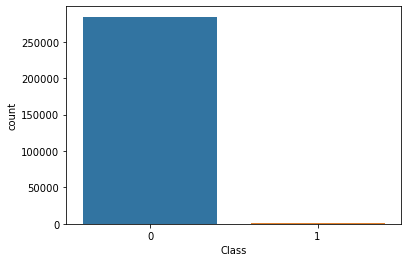

In [57]:
sns.countplot('Class',data=df)

### Imbalanced Dataset since label 0 is very high compared to label 1

In [58]:
df['Class'].value_counts() #Imbalanced Dataset since label 0 is very high compared to label 1

0    284315
1       492
Name: Class, dtype: int64

In [59]:
X = df.drop('Class', axis=1)
y = df['Class']

In [60]:
X[:5]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [61]:
X1 = df.iloc[:,:-1]
y1 = df.iloc[:,-1:]

In [62]:
X1[:5]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


#### Cross Validation like KFold & Hyperparameter tuning

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, GridSearchCV
import numpy as np

In [64]:
10.0**np.arange(-2,3)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [66]:
print('y_train\n', y_train.value_counts())
print('y_test\n', y_test.value_counts())

y_train
 0    199035
1       329
Name: Class, dtype: int64
y_test
 0    85280
1      163
Name: Class, dtype: int64


In [67]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [68]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

/home/vinoth/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.82826024        nan 0.83901062        nan 0.8364958
        nan 0.83137592        nan 0.83708969]
  warnings.warn(
/home/vinoth/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [69]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85230    50]
 [   54   109]]
0.9987828142738434
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85280
           1       0.69      0.67      0.68       163

    accuracy                           1.00     85443
   macro avg       0.84      0.83      0.84     85443
weighted avg       1.00      1.00      1.00     85443



In [70]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [72]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85274     6]
 [   36   127]]
0.9995084442259752
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85280
           1       0.95      0.78      0.86       163

    accuracy                           1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



### Under Sampling

#### https://github.com/krishnaik06/Handle-Imbalanced-Dataset/blob/master/Handling%20Imbalanced%20Data-%20Under%20Sampling.ipynb

Random Undersampling aims to balance class distribution by randomly eliminating majority class examples.  This is done until the majority and minority class instances are balanced out.

Total Observations = 1000

Fraudulent   Observations =20

Non Fraudulent Observations = 980

Event Rate= 2 %

In this case we are taking 10 % samples without replacement from Non Fraud instances.  And combining them with Fraud instances.

Non Fraudulent Observations after random under sampling = 10 % of 980 =98

Total Observations after combining them with Fraudulent observations = 20+98=118

Event Rate for the new dataset after under sampling = 20/118 = 17%

 

#### Advantages

It can help improve run time and storage problems by reducing the number of training data samples when the training data set is huge.

#### Disadvantages

It can discard potentially useful information which could be important for building rule classifiers.
The sample chosen by random under sampling may be a biased sample. And it will not be an accurate representative of the population. Thereby, resulting in inaccurate results with the actual test data set.

In [73]:
from imblearn.under_sampling import NearMiss
from collections import Counter

In [75]:
# Implementing undersampling for handling Imbalanced - Training dataset
nm = NearMiss(0.8)
X_train_ns,y_train_ns = nm.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

/home/vinoth/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:587: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


The number of classes before fit Counter({0: 199035, 1: 329})
The number of classes after fit Counter({0: 411, 1: 329})


#### NearMiss will pick size of class with least count. Then it reduces major class to match minor class size.

In [76]:
X_train_ns.shape, y_train_ns.shape

((740, 30), (740,))

In [77]:
X_train.shape,y_train.shape

((199364, 30), (199364,))

In [78]:
def predict(X_train,y_train):
    classifier=RandomForestClassifier()
    classifier.fit(X_train,y_train)
    return classifier

In [79]:
rm_classifier = predict(X_train_ns,y_train_ns)

In [80]:
y_pred = rm_classifier.predict(X_test)

In [81]:
from sklearn.metrics import classification_report, accuracy_score
cr = classification_report(y_test,y_pred)
print(accuracy_score(y_test,y_pred))
print(cr)

0.8305537024683122
              precision    recall  f1-score   support

           0       1.00      0.83      0.91     85280
           1       0.01      0.91      0.02       163

    accuracy                           0.83     85443
   macro avg       0.50      0.87      0.46     85443
weighted avg       1.00      0.83      0.91     85443



### Over Sampling

Over-Sampling increases the number of instances in the minority class by randomly replicating them in order to present a higher representation of the minority class in the sample.

Total Observations = 1000

Fraudulent   Observations =20

Non Fraudulent Observations = 980

Event Rate= 2 %

In this case we are replicating 20 fraud observations   20 times.

Non Fraudulent Observations =980

Fraudulent Observations after replicating the minority class observations= 400

Total Observations in the new data set after oversampling=1380

Event Rate for the new data set after under sampling= 400/1380 = 29 %

#### Advantages
- Unlike under sampling this method leads to no information loss.
- Outperforms under sampling

#### Disadvantages
It increases the likelihood of overfitting since it replicates the minority class events.

#### https://github.com/krishnaik06/Handle-Imbalanced-Dataset/blob/master/Handling%20Imbalanced%20Data-%20Over%20Sampling.ipynb

### Over sampling is more used than under sampling

In [82]:
from imblearn.over_sampling import RandomOverSampler

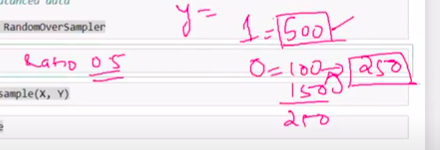

Ratio = 1 ---> 1:1 ---> 1 - 500, 0 - 100+400=500<br/>
Ratio = 0.5 ---> 1:0.5(50% of 1's count) ---> 1 - 500, 0 - 100+150(Added to match 50% of 500)=250<br/>
Ratio = 0.75 ---> 1:0.75(75% of 1's count) ---> 1 - 500, 0 - 100+275(Added to match 75% of 500)=375(75% of 500)

In [84]:
# Implementing Oversampling for Handling Imbalanced 
os = RandomOverSampler()
X_train_res,y_train_res = os.fit_resample(X_train,y_train)

In [85]:
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 199035, 1: 329})
Resampled dataset shape Counter({0: 199035, 1: 199035})


In [86]:
X_train_ns.shape, y_train_ns.shape

((740, 30), (740,))

In [87]:
X_train.shape,y_train.shape

((199364, 30), (199364,))

### SMOTETomek

In [48]:
from imblearn.combine import SMOTETomek

In [49]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_train_res,y_train_res = smk.fit_resample(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

### Ensemble Techniques

https://github.com/krishnaik06/Handle-Imbalanced-Dataset/blob/master/handling-imbalanced.ipynb